A DL project to classify chiwawa vs blueberry muffin using pretrained model Resnet50 

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50

trainDir = 'muffin-vs-chihuahua-image-classification/train' # train set directory
testDir = 'muffin-vs-chihuahua-image-classification/test' # test set directory

The image size for ResNet50 is (224,224,3), RGB image, The batch size is set to 64
dividing the data to train and validation sets

In [2]:
batch_size = 64 # batch size for each iteration
img_size = 224 # image size 

train_data = keras.utils.image_dataset_from_directory( # load image data for training
  trainDir,
  validation_split=0.2,
  subset="training",
  seed = 100,
  image_size=(img_size, img_size),
  batch_size=batch_size)

val_data = keras.utils.image_dataset_from_directory( # load image data for testing
  trainDir,
  validation_split=0.2,
  subset="validation",
  seed = 100,
  image_size=(img_size, img_size),
  batch_size=batch_size)

Found 4733 files belonging to 2 classes.
Using 3787 files for training.
Found 4733 files belonging to 2 classes.
Using 946 files for validation.


In [3]:
class_names = train_data.class_names # show the class names
print(class_names) 

['chihuahua', 'muffin']


Visualization to some images from the data set

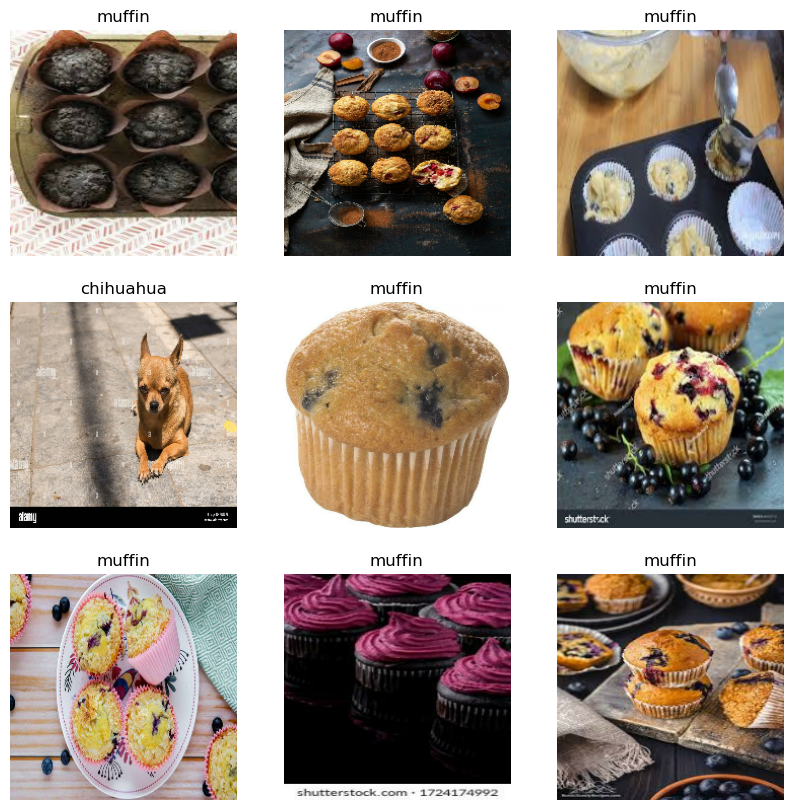

In [4]:
import matplotlib.pyplot as plt

''' visualizstion '''
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
num_classes = 2


model = keras.Sequential()
model.add(ResNet50(include_top=False, pooling='avg'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

# dont train ResNet50 weights
model.layers[0].trainable = False

model.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 23,718,978
Trainable params: 131,266
Non-trainable params: 23,587,712
_________________________________________________________________


In [6]:
model.compile(
  optimizer='adam',
  loss=keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [7]:
model.fit(
  train_data,
  validation_data=val_data,
  epochs=5
)

Epoch 1/5
60/60 [==============================] - 43s 537ms/step - loss: 0.1253 - accuracy: 0.9546 - val_loss: 0.0524 - val_accuracy: 0.9799
Epoch 2/5
60/60 [==============================] - 19s 288ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.0467 - val_accuracy: 0.9810
Epoch 3/5
60/60 [==============================] - 19s 289ms/step - loss: 0.0129 - accuracy: 0.9966 - val_loss: 0.0382 - val_accuracy: 0.9852
Epoch 4/5
60/60 [==============================] - 18s 276ms/step - loss: 0.0079 - accuracy: 0.9987 - val_loss: 0.0366 - val_accuracy: 0.9863
Epoch 5/5
60/60 [==============================] - 19s 293ms/step - loss: 0.0042 - accuracy: 0.9997 - val_loss: 0.0362 - val_accuracy: 0.9884


In [8]:
test_data = keras.utils.image_dataset_from_directory( # load image data for testing
  testDir,
  image_size=(img_size, img_size))

# You can also evaluate or predict on a dataset.
print("Evaluate")
result = model.evaluate(test_data)
dict(zip(model.metrics_names, result))

Found 1184 files belonging to 2 classes.
Evaluate
37/37 [==============================] - 8s 165ms/step - loss: 0.0207 - accuracy: 0.9932


{'loss': 0.020721623674035072, 'accuracy': 0.9932432174682617}

In [9]:
from tensorflow.keras.preprocessing import image
def predict(img_url):
    img = image.load_img(img_url, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_batch)[0]
    if prediction[0] > prediction[1]:
        print('it is a chiwawa!')
    else:
        print('it is a muffin!')

1/1 [==============================] - 1s 1s/step
it is a chiwawa!


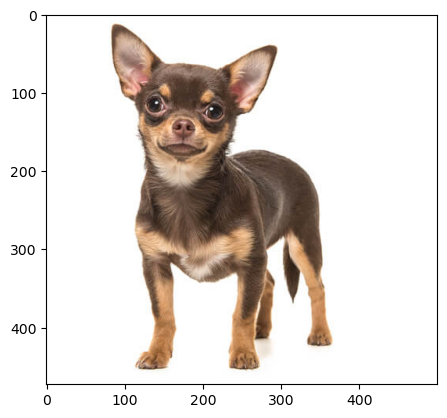

1/1 [==============================] - 0s 32ms/step
it is a chiwawa!


In [10]:
chiwawa_test = 'BREED Hero_0034_chihuahua_smooth.jpg'
from matplotlib import image as mpimg
from matplotlib import pyplot as plt
predict(chiwawa_test)
img = mpimg.imread(chiwawa_test)
plt.imshow(img)
plt.show()
predict(chiwawa_test)

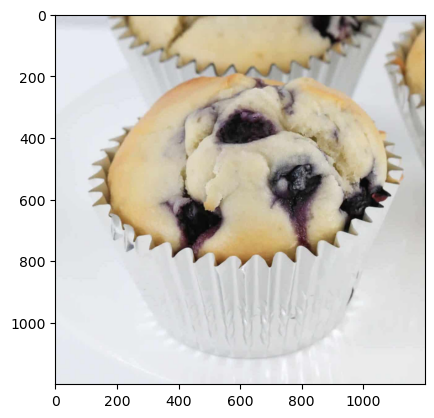

1/1 [==============================] - 0s 26ms/step
it is a muffin!


In [11]:
muffin_test = 'Thermomix-Blueberry-Muffins-square.jpg'
img = mpimg.imread(muffin_test)
plt.imshow(img)
plt.show()
predict(muffin_test)